In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats 

In [3]:
# Data Base Connection
conn = sqlite3.connect('inventory.db')

# Fetch and store relevant vendor data
df = pd.read_sql_query(" select * from vendorSalesSummary", conn)
print(len(df))
df.head()


10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalSalesQuantity,TotalSalesDollars,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,142049.0,5101919.51,145080,3811251.60,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,160247.0,4819073.49,164038,3804041.22,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187140.0,4538120.60,187407,3418303.68,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,200412.0,4475972.88,201682,3261197.94,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,135838.0,4223107.62,138109,3023206.01,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


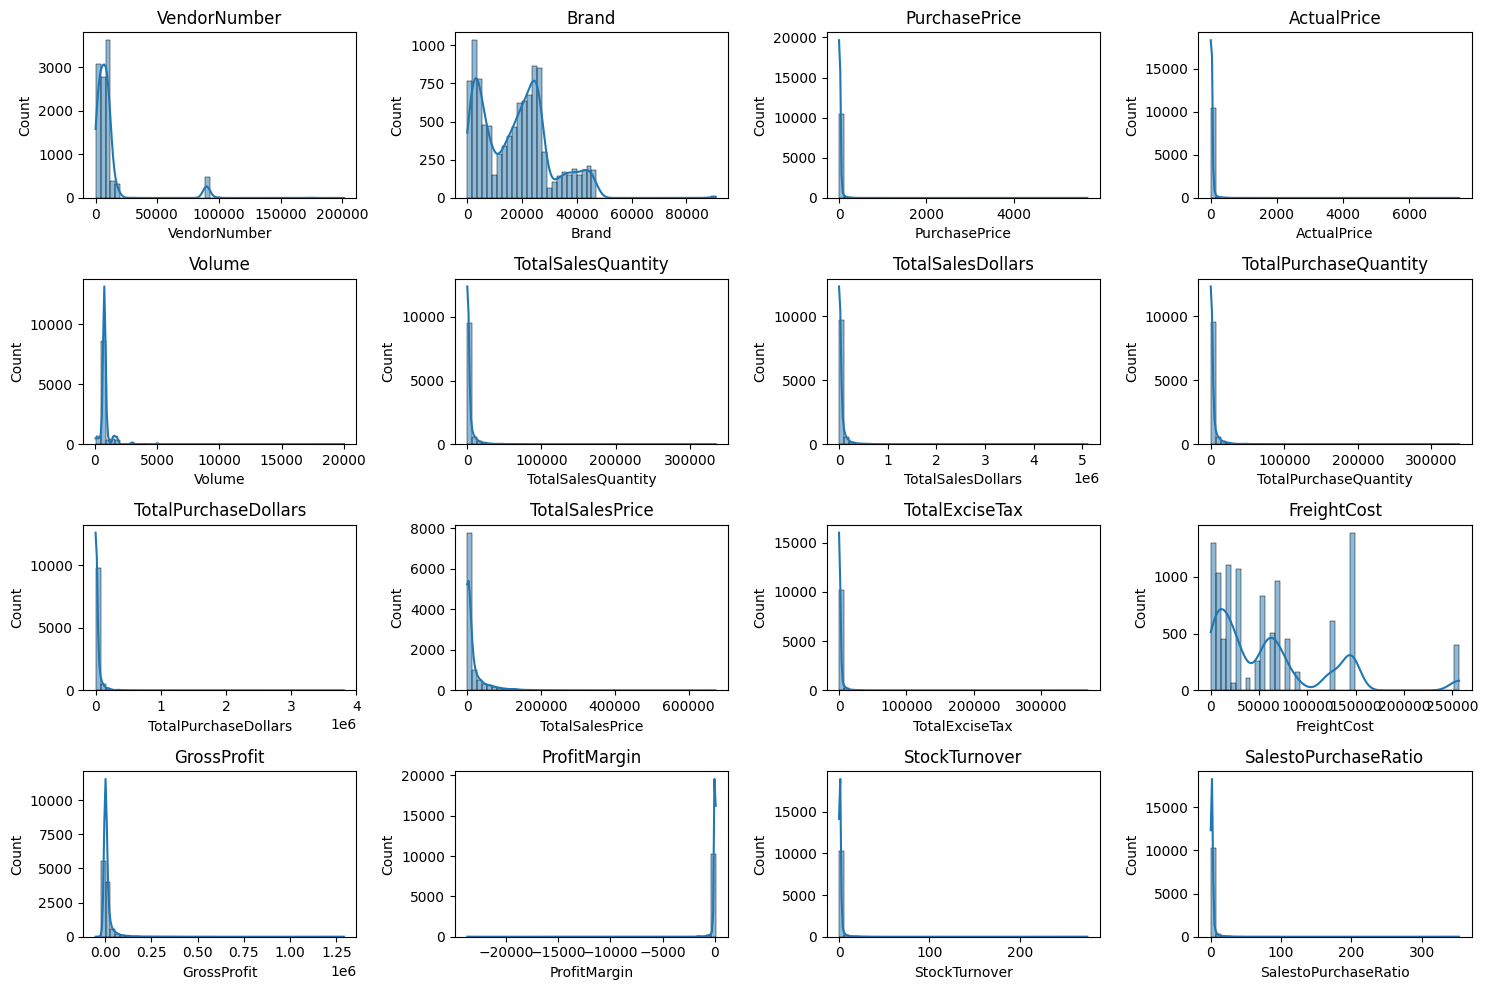

In [4]:
numericalCols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))

for i, col in enumerate(numericalCols):
    plt.subplot(4,4, i+1) # adjusts grid size accordingly
    sns.histplot(df[col], kde = True , bins = 50)
    plt.title(col)
plt.tight_layout()
plt.show()

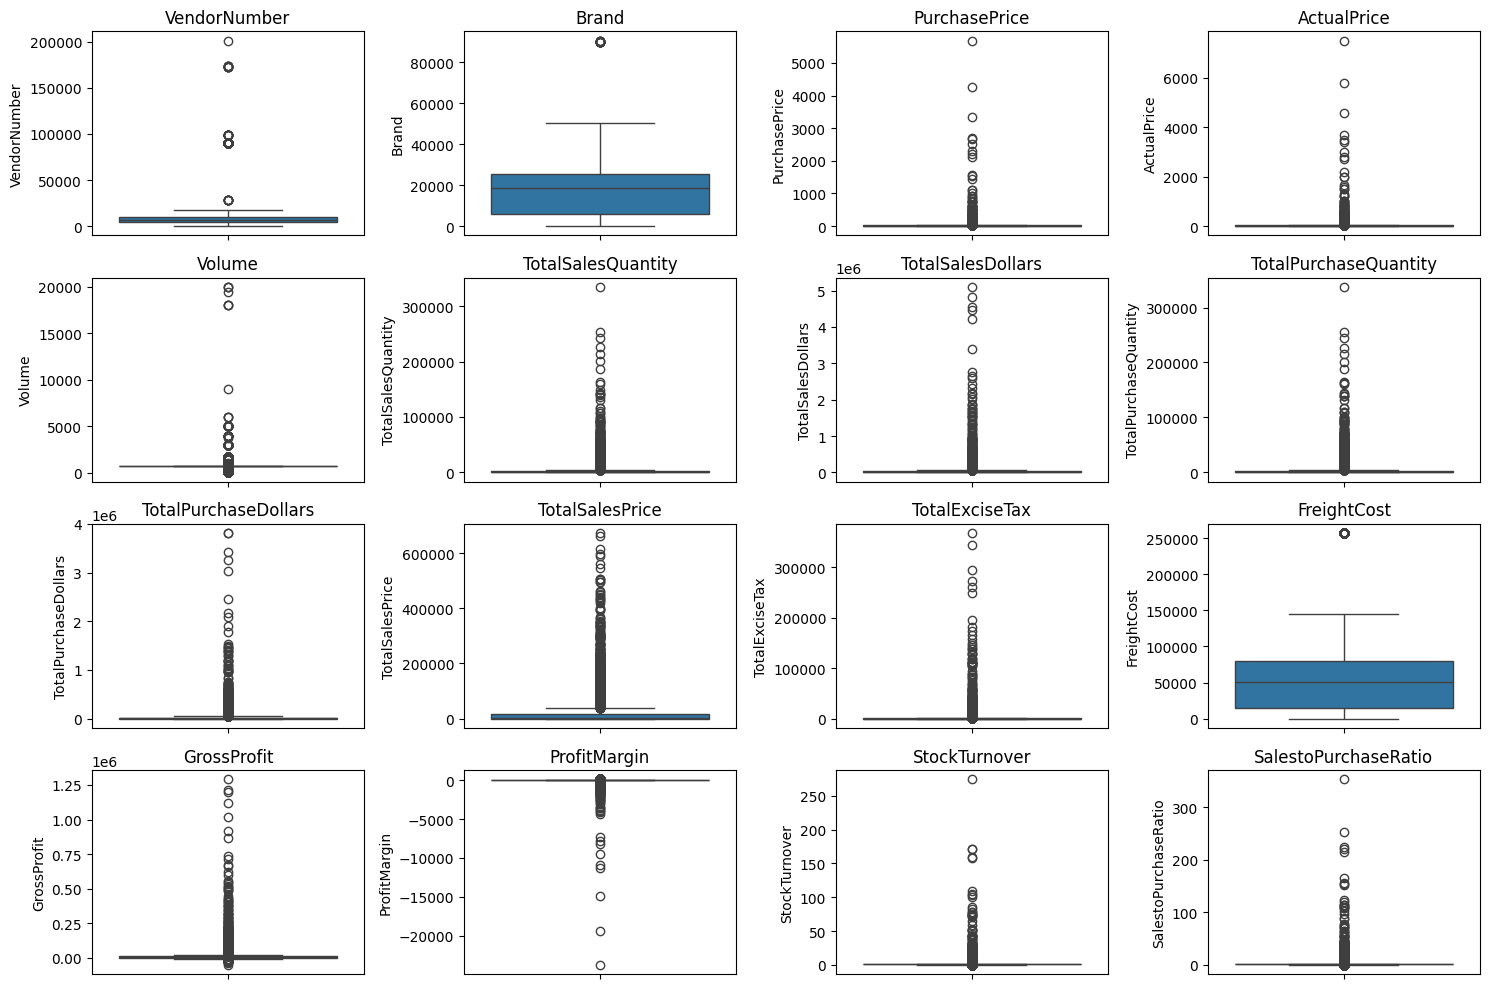

In [5]:
plt.figure(figsize = (15,10))

for i, col in enumerate(numericalCols):
    plt.subplot(4,4, i+1) # adjusts grid size accordingly
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
for i, col in enumerate(numericalCols):
    print(col,"\nMean:",df[col].mean())
    print("Maximum Value:",df[col].max())

VendorNumber 
Mean: 10650.649457538346
Maximum Value: 201359
Brand 
Mean: 18039.228769173213
Maximum Value: 90631
PurchasePrice 
Mean: 24.38530303030303
Maximum Value: 5681.81
ActualPrice 
Mean: 35.64367096894875
Maximum Value: 7499.99
Volume 
Mean: 847.3605499438833
Maximum Value: 20000.0
TotalSalesQuantity 
Mean: 3077.4821361765808
Maximum Value: 334939.0
TotalSalesDollars 
Mean: 42239.074419191915
Maximum Value: 5101919.51
TotalPurchaseQuantity 
Mean: 3140.88683127572
Maximum Value: 337660
TotalPurchaseDollars 
Mean: 30106.69337167977
Maximum Value: 3811251.6
TotalSalesPrice 
Mean: 18793.783627010846
Maximum Value: 672819.31
TotalExciseTax 
Mean: 1774.2262588851481
Maximum Value: 368242.8
FreightCost 
Mean: 61433.763213617654
Maximum Value: 257032.07
GrossProfit 
Mean: 12132.381047512159
Maximum Value: 1290667.9099999997
ProfitMargin 
Mean: -inf
Maximum Value: 99.71665654725764
StockTurnover 
Mean: 1.7067934200154453
Maximum Value: 274.5
SalestoPurchaseRatio 
Mean: 2.504389897409392

In [7]:
df = pd.read_sql_query("""SELECT *
FROM vendorSalesSummary
WHERE GrossProfit > 0
AND ProfitMargin > 0 
AND TotalSalesQuantity > 0""", conn
)

In [8]:
len(df)

8564

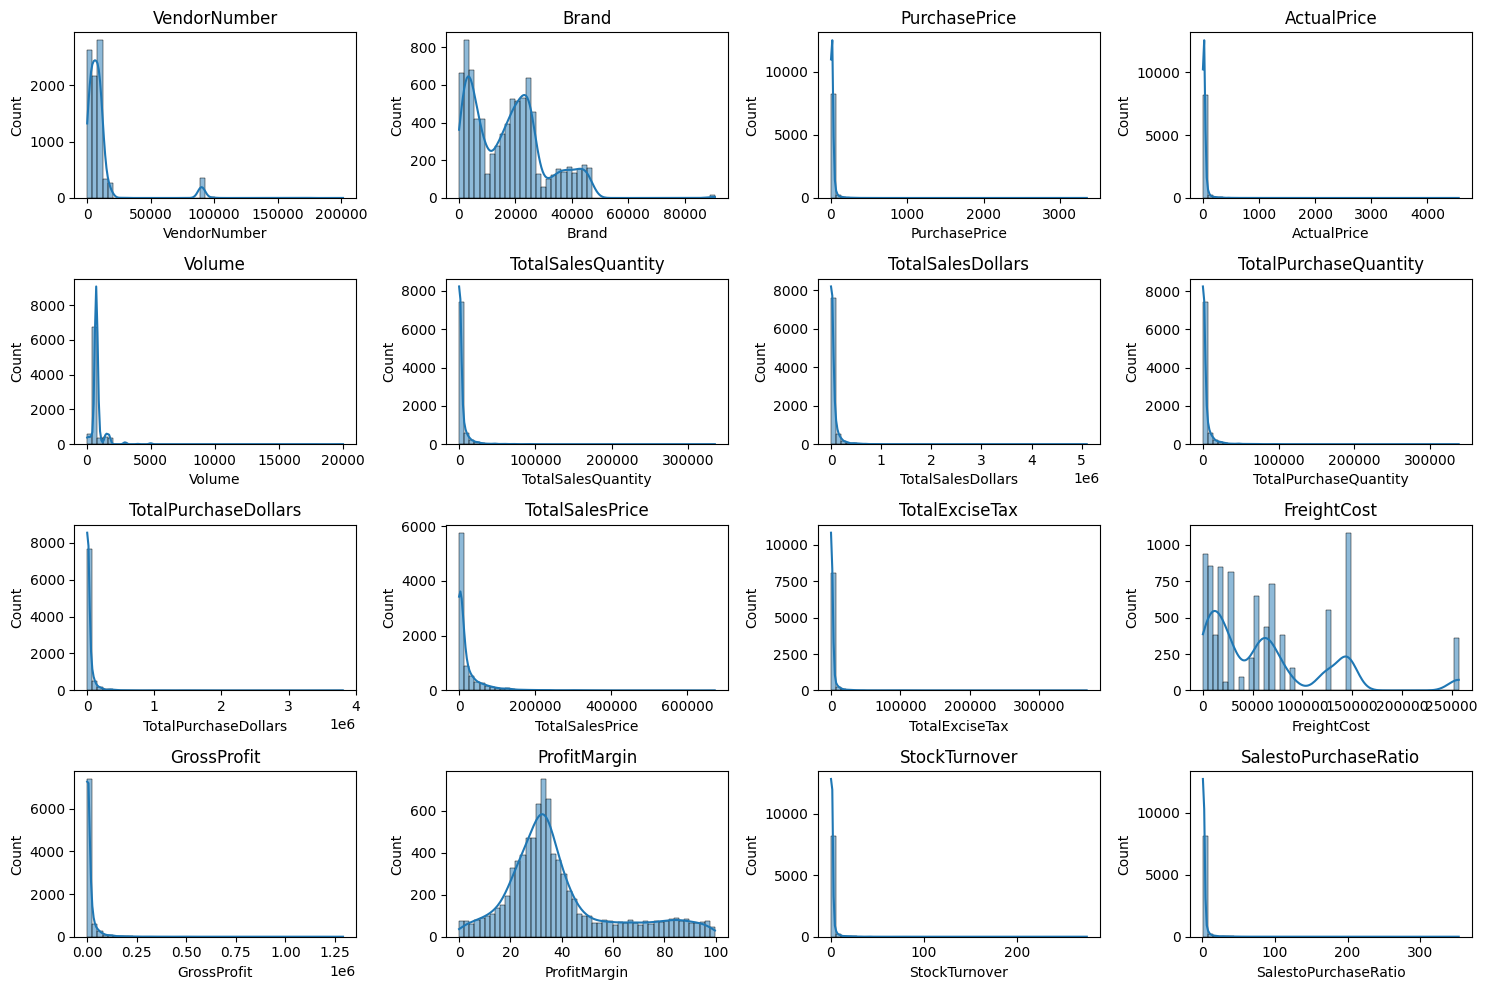

In [9]:
numericalCols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))

for i, col in enumerate(numericalCols):
    plt.subplot(4,4, i+1) # adjusts grid size accordingly
    sns.histplot(df[col], kde = True , bins = 50)
    plt.title(col)
plt.tight_layout()
plt.show()

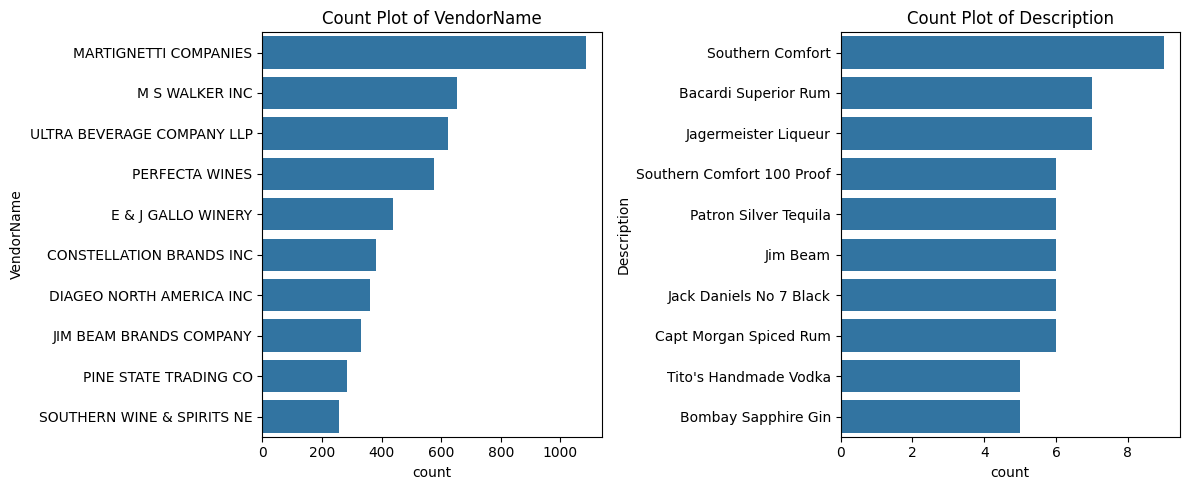

In [10]:
categorical_cols = ["VendorName","Description"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df [col], order=df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

In [11]:
brandPerformance = df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin': 'mean'}).reset_index()

lowSalesThreshold = brandPerformance['TotalSalesDollars'].quantile(0.15)
highMarginThreshold = brandPerformance['ProfitMargin'].quantile(0.85)

targetBrands = brandPerformance[(brandPerformance['TotalSalesDollars'] <= lowSalesThreshold) &
                                 (brandPerformance['ProfitMargin'] >= highMarginThreshold)
]

print ("Brands with low sales but high profit margins:")
display(targetBrands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


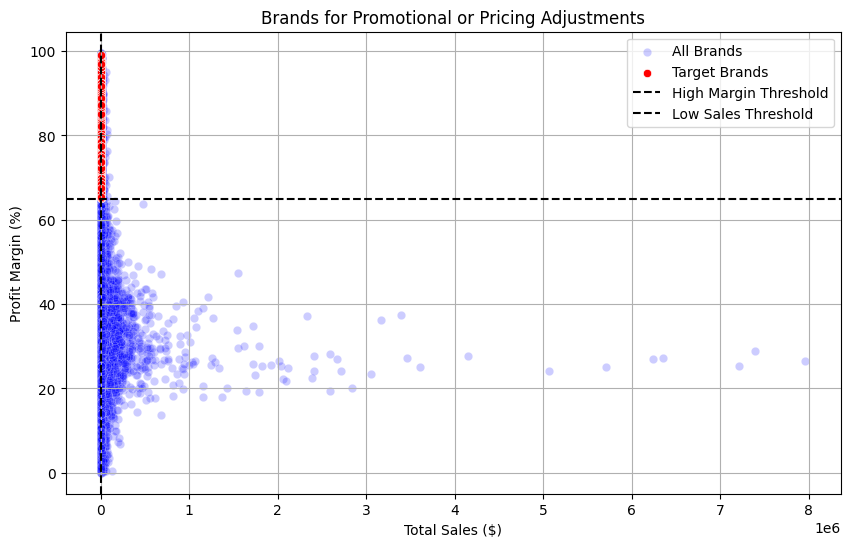

In [12]:
plt.figure(figsize=(10, 6))
sns .scatterplot(data=brandPerformance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns .scatterplot(data=targetBrands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt .axhline(highMarginThreshold, linestyle='--', color='black', label="High Margin Threshold")
plt .axvline(lowSalesThreshold, linestyle='--', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
brandPerformance=brandPerformance[brandPerformance['TotalSalesDollars']<10000] #limit sales to 10000 for better visualisation

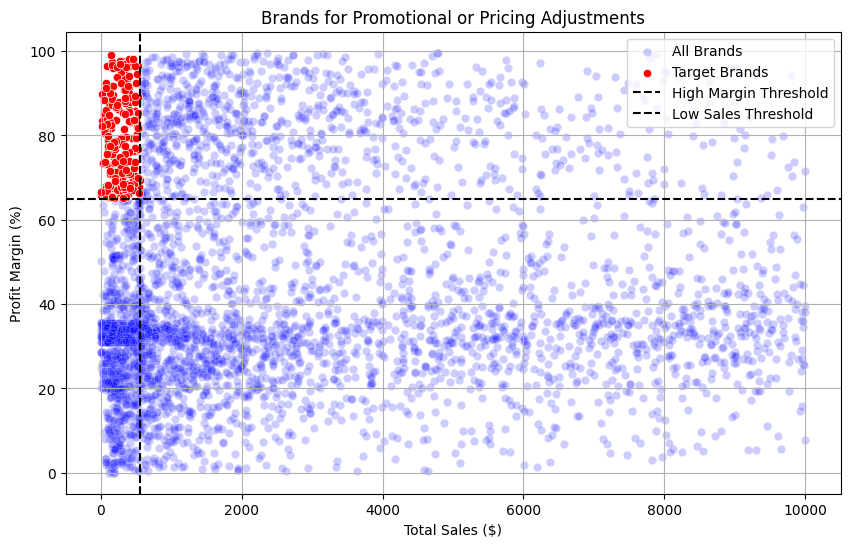

In [14]:
#replot with adjustment
plt.figure(figsize=(10, 6))
sns .scatterplot(data=brandPerformance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns .scatterplot(data=targetBrands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt .axhline(highMarginThreshold, linestyle='--', color='black', label="High Margin Threshold")
plt .axvline(lowSalesThreshold, linestyle='--', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# DETERMINE TOP BRANDS
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby ("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors , top_brands

(VendorName
 DIAGEO NORTH AMERICA INC      67990099.42
 MARTIGNETTI COMPANIES         39330359.36
 PERNOD RICARD USA             32063196.19
 JIM BEAM BRANDS COMPANY       31423020.46
 BACARDI USA INC               24854817.14
 CONSTELLATION BRANDS INC      24218745.65
 E & J GALLO WINERY            18399899.46
 BROWN-FORMAN CORP             18247230.65
 ULTRA BEVERAGE COMPANY LLP    16502544.31
 M S WALKER INC                14706458.51
 Name: TotalSalesDollars, dtype: float64,
 Description
 Jack Daniels No 7 Black    7964746.76
 Tito's Handmade Vodka      7399657.58
 Grey Goose Vodka           7209608.06
 Capt Morgan Spiced Rum     6356320.62
 Absolut 80 Proof           6244752.03
 Jameson Irish Whiskey      5715759.69
 Ketel One Vodka            5070083.56
 Baileys Irish Cream        4150122.07
 Kahlua                     3604858.66
 Tanqueray                  3456697.90
 Name: TotalSalesDollars, dtype: float64)

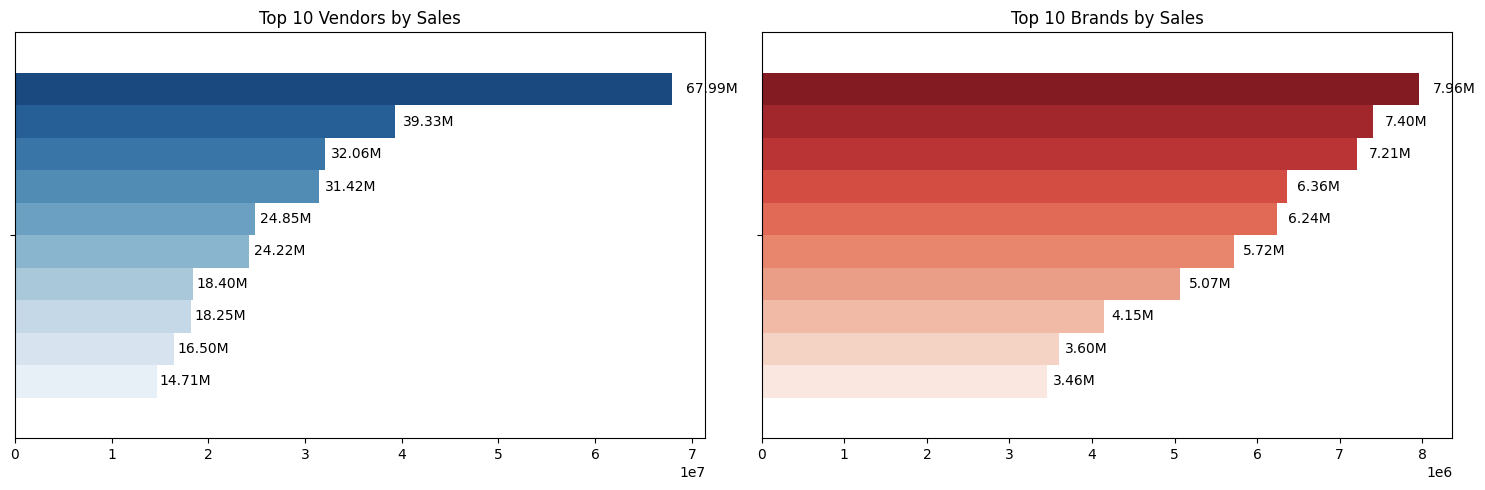

In [16]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000: 
        return f"{value / 1_000:.2f}K"
    else:
        return f"{value:.0f}"  


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
ax1 = sns.barplot(hue=top_vendors.index, x=top_vendors.values, palette="Blues_r", legend=False)
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text( 
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )


plt.subplot(1, 2, 2)
ax2 = sns.barplot(hue=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r", legend=False)
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

In [17]:
vendorPerformance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

vendorPerformance['PurchaseContribution%'] = vendorPerformance['TotalPurchaseDollars'] / vendorPerformance['TotalPurchaseDollars'].sum()


In [18]:
vendorPerformance =round(vendorPerformance.sort_values('PurchaseContribution%', ascending = False), 2)


In [19]:
top_vendors = vendorPerformance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

/var/folders/pz/rnwjhcls1l531gxmt27k2q5w0000gn/T/ipykernel_77377/495691060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
/var/folders/pz/rnwjhcls1l531gxmt27k2q5w0000gn/T/ipykernel_77377/495691060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
/var/folders/pz/rnwjhcls1l531gxmt27k2q5w0000gn/T/ipykernel_77377/4956910

In [20]:
print(top_vendors)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
print(purchase_contributions)
total_contribution = sum(purchase_contributions)
print(total_contribution)

                     VendorName TotalPurchaseDollars GrossProfit  \
25     DIAGEO NORTH AMERICA INC               50.10M      17.89M   
57        MARTIGNETTI COMPANIES               25.50M      13.83M   
68            PERNOD RICARD USA               23.85M       8.21M   
46      JIM BEAM BRANDS COMPANY               23.49M       7.93M   
6               BACARDI USA INC               17.43M       7.42M   
20     CONSTELLATION BRANDS INC               15.27M       8.95M   
11            BROWN-FORMAN CORP               13.24M       5.01M   
30           E & J GALLO WINERY               12.07M       6.33M   
106  ULTRA BEVERAGE COMPANY LLP               11.17M       5.34M   
53               M S WALKER INC                9.76M       4.94M   

    TotalSalesDollars  PurchaseContribution%  
25             67.99M                   0.16  
57             39.33M                   0.08  
68             32.06M                   0.08  
46             31.42M                   0.08  
6              2

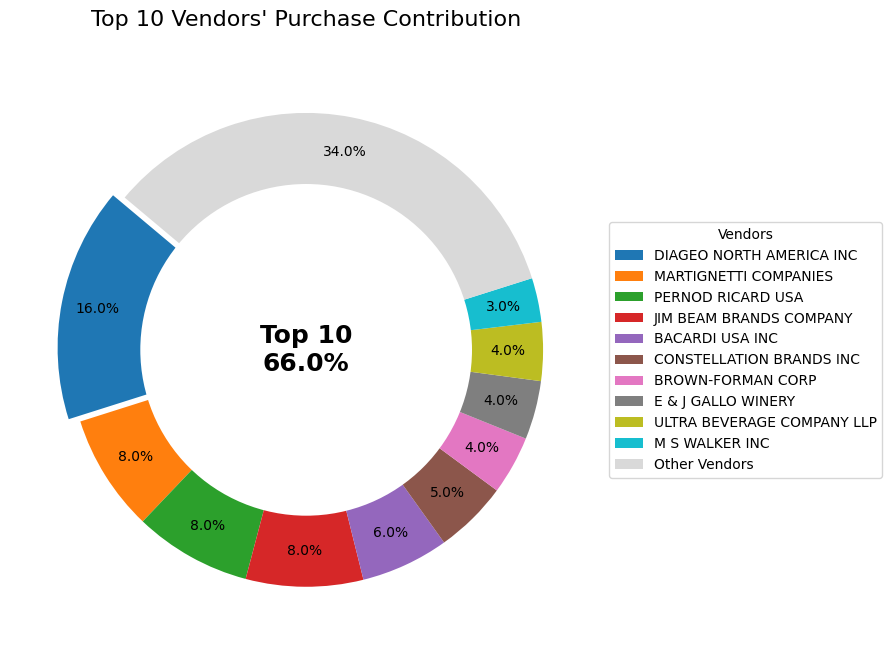

In [21]:
top_vendors_sorted = top_vendors.sort_values('PurchaseContribution%', ascending=False)

vendors = list(top_vendors_sorted['VendorName'].values)
purchase_contributions = list(top_vendors_sorted['PurchaseContribution%'].values)

total_contribution_pct = sum(purchase_contributions) * 100
remaining_contribution = (100 - total_contribution_pct) / 100


labels = vendors + ["Other Vendors"]
plot_values = purchase_contributions + [remaining_contribution]
colors = plt.cm.tab10.colors[:len(vendors)] + ((0.85, 0.85, 0.85),)
explode = [0.05] + [0]*9 + [0]


fig, ax = plt.subplots(figsize=(9, 9))
wedges, texts, autotexts = ax.pie(
    plot_values,
    labels=None,  
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors,
    explode = explode,
    textprops={'fontsize': 10, 'color': 'black'}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.text(
    0.0, 0.0,
    f"Top 10\n{total_contribution_pct:.1f}%",
    fontsize=18,
    fontweight='bold',
    ha='center',
    va='center'
)


ax.legend(wedges, labels, title="Vendors", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title("Top 10 Vendors' Purchase Contribution", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [24]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"], q = 3 , labels = ["Small", "Medium", "Large"])

In [27]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

/var/folders/pz/rnwjhcls1l531gxmt27k2q5w0000gn/T/ipykernel_77377/1505448859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


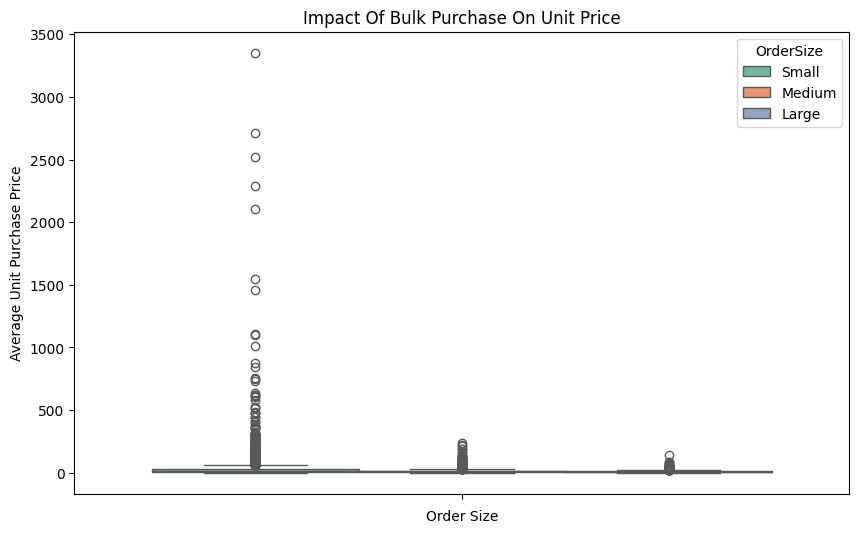

In [32]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, hue="OrderSize", y="UnitPurchasePrice", palette = "Set2", label = False)
plt.title("Impact Of Bulk Purchase On Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [48]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover', ascending = True).head(10)


,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [52]:
# Setup For Confidence Interval
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [53]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [54]:
from scipy import stats

def confidenceInterval(data, confidence = 0.95):
    data = np.array(data)
    data = data[~np.isnan(data)]  # remove NaNs if present

    n = len(data)
    if n == 0:
        raise ValueError("Cannot compute confidence interval of empty data.")

    mean = np.mean(data)
    sem = stats.sem(data) 
    margin = sem * stats.t.ppf((1 + confidence) / 2., n - 1)

    return mean, mean - margin, mean + margin

Top Vendors - Profit Margin
Mean: 31.18, 95% CI: (30.74, 31.61)

Low Vendors - Profit Margin
Mean: 41.57, 95% CI: (40.50, 42.64)


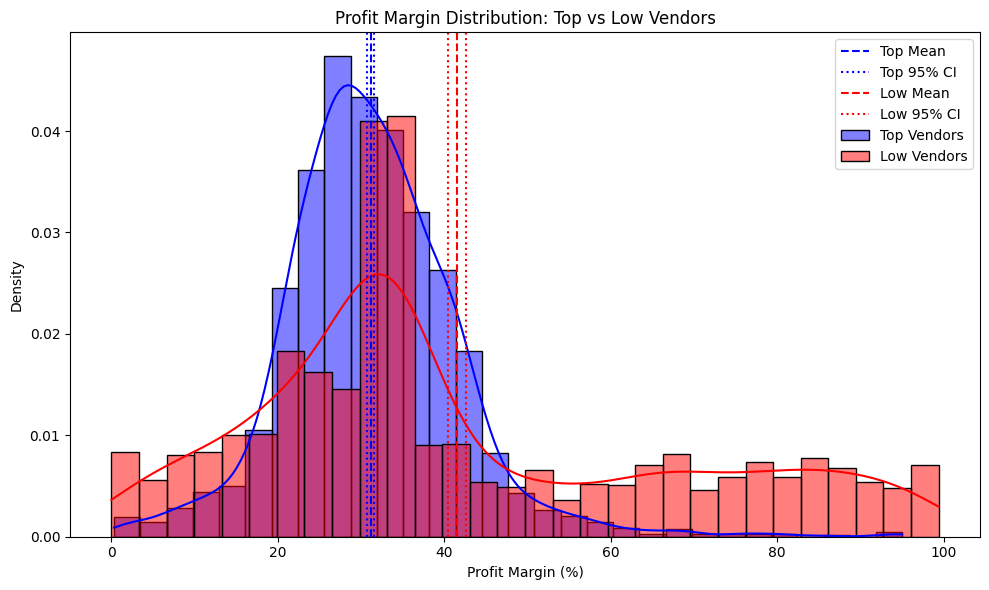

In [59]:
top_mean, top_ci_low, top_ci_high = confidenceInterval(top_vendors)
low_mean, low_ci_low, low_ci_high = confidenceInterval(low_vendors)

print("Top Vendors - Profit Margin")
print(f"Mean: {top_mean:.2f}, 95% CI: ({top_ci_low:.2f}, {top_ci_high:.2f})\n")

print("Low Vendors - Profit Margin")
print(f"Mean: {low_mean:.2f}, 95% CI: ({low_ci_low:.2f}, {low_ci_high:.2f})")


plt.figure(figsize=(10, 6))
sns.histplot(top_vendors, color='blue', label='Top Vendors', kde=True, stat='density', bins=30)
sns.histplot(low_vendors, color='red', label='Low Vendors', kde=True, stat='density', bins=30)

plt.axvline(top_mean, color='blue', linestyle='--', label='Top Mean')
plt.axvline(top_ci_low, color='blue', linestyle=':', label='Top 95% CI')
plt.axvline(top_ci_high, color='blue', linestyle=':')

plt.axvline(low_mean, color='red', linestyle='--', label='Low Mean')
plt.axvline(low_ci_low, color='red', linestyle=':', label='Low 95% CI')
plt.axvline(low_ci_high, color='red', linestyle=':')

plt.title("Profit Margin Distribution: Top vs Low Vendors")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
#Hypothesis Testing (t-test)

t_stat, p_value = stats.ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print result
print("Two-sample t-test:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print(" Reject the null hypothesis: There is a significant difference.")
else:
    print(" Fail to reject the null hypothesis: No significant difference.")

Two-sample t-test:
T-statistic: -17.6695
P-value: 0.0000
 Reject the null hypothesis: There is a significant difference.
